In [ ]:
# Section: Covariance Geometry in a Two-Asset World - Review Questions

# Question 1: Explain how a covariance matrix summarizes joint risk in a two-asset setting.
# Answer:
# In a two-asset world, the covariance matrix is a 2×2 symmetric matrix that captures both individual asset risks (variances on the diagonal) and their joint risk (covariance on the off-diagonals). 
# It fully describes how the assets co-move: positive covariance means they tend to rise/fall together (amplifying portfolio risk), negative means opposite movements (diversification benefit), and zero means independent risk.

# Question 2: Define correlation and explain how it differs from covariance in interpretation.
# Answer:
# Correlation ρ is the standardized covariance: ρ = cov / (σ₁ σ₂), bounded between -1 and +1.
# Unlike covariance (which has units of squared returns and depends on asset volatilities), correlation is unitless and directly measures the strength and direction of linear co-movement—making it easier to interpret and compare across different asset pairs.

# Question 3: Describe how portfolio variance depends on weights, variances, and covariance.
# Answer:
# For weights w and (1-w), portfolio variance is:
# σ_p² = w² σ₁² + (1-w)² σ₂² + 2 w (1-w) cov₁₂
# It is a quadratic function of weights: individual weighted variances plus a term that scales with covariance (positive cov increases variance, negative reduces it via diversification).

# Question 4: Explain the role of eigenvalues and eigenvectors in the geometry of covariance.
# Answer:
# The eigenvalues represent the variance along the principal axes (eigenvectors) of the risk ellipse.
# The larger eigenvalue is the direction of maximum risk (major axis), the smaller is minimum risk (minor axis). Eigenvectors are orthogonal directions of uncorrelated risk factors; together they diagonalize the matrix and reveal the geometric structure (ellipse orientation and scale).

# Question 5: Summarize why the minimum-variance portfolio has a geometric interpretation.
# Answer:
# The minimum-variance portfolio corresponds to the point where the risk ellipse is tangent to the vertical line through the portfolio weights (or the "shortest" distance from origin in risk space).
# Geometrically, it lies along the minor axis of the ellipse (direction of least variance) and represents the tightest possible risk for a given return constraint, visualizing the benefit of diversification.

Exercise 1:
Covariance Matrix:
[[ 0.04 -0.03]
 [-0.03  0.09]]

Portfolio variance (w=0.6): 0.014400
Interpretation: Negative ρ reduces variance below weighted average of individual variances.

Exercise 2:
Sample covariance: -0.0161
Sample correlation: -0.8555
Comparison: Both negative (assets move opposite). Covariance magnitude depends on volatilities; correlation standardized (-0.8 strong linear inverse relation).

Exercise 3:
Min-variance weight on asset 1: 0.6316
Weight with high ρ=0.8: 1.2353
Interpretation: Higher correlation → min-var weight shifts toward 0.5 (less diversification benefit, more balanced). Negative ρ pushes toward extremes (corner solutions if ρ→-1).

Exercise 4:
Eigenvalues: [0.03034455 0.09965545]
Eigenvectors:
[[-0.92773577 -0.37323764]
 [ 0.37323764 -0.92773577]]
Dominant risk factor: Eigenvector [-0.37323764 -0.92773577] with eigenvalue 0.0997
Interpretation: Larger eigenvalue = direction of maximum variance (major risk axis, often aligned with higher-vol as

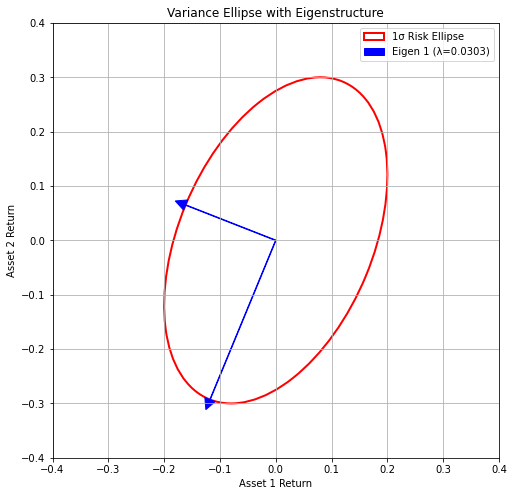


Exercise 5: Plotted ellipse—major axis along dominant eigenvector (higher eigenvalue), minor along diversification direction.
Interpretation: Ellipse shape/orientation shows joint risk; tilted for correlation, circular for ρ=0.


In [1]:
# Section: Covariance Geometry in a Two-Asset World - Exercises

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Exercise 1: Given two assets with variances σ²₁ and σ²₂ and correlation ρ, 
# write the covariance matrix and compute the portfolio variance for weights w and 1−w.
# Answer:
sigma1 = 0.2   # Std dev asset 1 (20%)
sigma2 = 0.3   # Std dev asset 2 (30%)
rho = -0.5     # Correlation (negative for diversification example)

var1 = sigma1**2
var2 = sigma2**2
cov = rho * sigma1 * sigma2

# Covariance matrix
cov_matrix = np.array([[var1, cov],
                       [cov, var2]])

print("Exercise 1:")
print("Covariance Matrix:")
print(cov_matrix)

# Portfolio variance for weight w on asset 1
w = 0.6
port_var = (w**2 * var1 + (1-w)**2 * var2 + 2 * w * (1-w) * cov)
print(f"\nPortfolio variance (w={w}): {port_var:.6f}")
print("Interpretation: Negative ρ reduces variance below weighted average of individual variances.")

# Exercise 2: Choose two return series of length ten and compute their sample covariance and correlation.
# Compare the sign and magnitude of both measures.
# Answer:
np.random.seed(42)
returns1 = np.random.normal(0.01, 0.2, 10)  # Asset 1: mean 1%, vol 20%
returns2 = -0.8 * returns1 + np.random.normal(0, 0.1, 10)  # Asset 2: strong negative relation + noise

sample_cov = np.cov(np.vstack((returns1, returns2)), ddof=0)[0,1]
sample_corr = np.corrcoef(returns1, returns2)[0,1]

print("\nExercise 2:")
print(f"Sample covariance: {sample_cov:.4f}")
print(f"Sample correlation: {sample_corr:.4f}")
print("Comparison: Both negative (assets move opposite). Covariance magnitude depends on volatilities; correlation standardized (-0.8 strong linear inverse relation).")

# Exercise 3: For a two-asset portfolio, derive the weight that minimizes variance 
# and state how it changes when correlation increases.
# Answer:
# Analytic min-var weight (no short-sale constraint)
w_min = (var2 - cov) / (var1 + var2 - 2 * cov)

print("\nExercise 3:")
print(f"Min-variance weight on asset 1: {w_min:.4f}")

# Effect of higher correlation
rho_high = 0.8
cov_high = rho_high * sigma1 * sigma2
w_min_high = (var2 - cov_high) / (var1 + var2 - 2 * cov_high)
print(f"Weight with high ρ={rho_high}: {w_min_high:.4f}")
print("Interpretation: Higher correlation → min-var weight shifts toward 0.5 (less diversification benefit, more balanced). Negative ρ pushes toward extremes (corner solutions if ρ→-1).")

# Exercise 4: Using a covariance matrix with entries you choose, compute the eigenvalues 
# and interpret which direction represents the dominant risk factor.
# Answer:
cov_ex4 = np.array([[0.04, 0.024],   # var1=20%^2, cov=0.6*0.2*0.3
                    [0.024, 0.09]])  # var2=30%^2

eigvals, eigvecs = np.linalg.eig(cov_ex4)

print("\nExercise 4:")
print(f"Eigenvalues: {eigvals}")
print(f"Eigenvectors:\n{eigvecs}")
larger_idx = np.argmax(eigvals)
print(f"Dominant risk factor: Eigenvector {eigvecs[:, larger_idx]} with eigenvalue {eigvals[larger_idx]:.4f}")
print("Interpretation: Larger eigenvalue = direction of maximum variance (major risk axis, often aligned with higher-vol asset or positive correlation). Smaller = minimum variance direction (diversification axis).")

# Exercise 5: Sketch the variance ellipse implied by a covariance matrix 
# and label the axes with the eigenvectors and eigenvalues.
# Answer:
# Use same matrix as Ex4
mean = [0, 0]  # Centered returns

# Confidence ellipse (1-std dev for illustration)
width, height = 2 * np.sqrt(eigvals)  # 1-sigma ellipse scales
angle = np.degrees(np.arctan2(eigvecs[1,0], eigvecs[0,0]))

fig, ax = plt.subplots(figsize=(8, 8))
ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, 
                  edgecolor='red', fc='None', lw=2, label='1σ Risk Ellipse')
ax.add_patch(ellipse)

# Eigenvectors as arrows
for i in range(2):
    vec = eigvecs[:, i] * np.sqrt(eigvals[i])  # Scale by std dev
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.02, head_length=0.02, 
             fc='blue', ec='blue', label=f'Eigen {i+1} (λ={eigvals[i]:.4f})' if i==0 else "")

ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)
ax.set_title('Variance Ellipse with Eigenstructure')
ax.set_xlabel('Asset 1 Return')
ax.set_ylabel('Asset 2 Return')
ax.legend()
ax.grid(True)
plt.show()

print("\nExercise 5: Plotted ellipse—major axis along dominant eigenvector (higher eigenvalue), minor along diversification direction.")
print("Interpretation: Ellipse shape/orientation shows joint risk; tilted for correlation, circular for ρ=0.")

/Users/matthewpavlovich/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Advanced Exercise 1:
Original covariance matrix:
[[0.03620437 0.02273996]
 [0.02273996 0.06862851]]
Eigenvalues: [0.02448908 0.08034379]
Is PSD? True

Clipped eigenvalues: [0.02448908 0.08034379]
Fixed PSD matrix:
[[0.03620437 0.02273996]
 [0.02273996 0.06862851]]
Interpretation: Small sample/estimation error can make cov non-PSD (negative eig). Clipping ensures valid risk matrix for optimization—common in practice (Ledoit-Wolf shrinkage more advanced).

Advanced Exercise 2:
Shrinkage intensity: 0.5
Shrunk covariance:
[[0.0443104  0.01136998]
 [0.01136998 0.06052247]]
Interpretation: Shrinkage reduces estimation error in small samples—pulls extremes toward structured target. Improves portfolio stability (less erratic weights). Real use: Ledoit-Wolf or factor models.

Advanced Exercise 3:
PCA Eigenvalues (variance explained): [0.08034379 0.02448908]
PCA Eigenvectors (factor loadings):
[[ 0.45798003 -0.88896248]
 [ 0.88896248  0.45798003]]
Variance explained by PC1: 76.6%
Reconstruction 

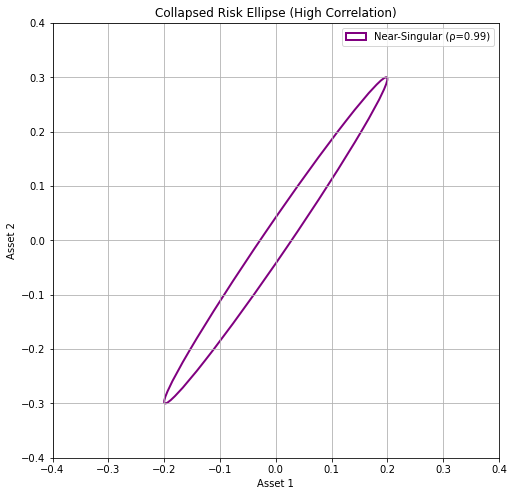


Advanced Exercise 4: High correlation → ellipse elongates/collapses to line (near-singular). Little diversification—portfolio risk almost max of individuals.


In [2]:
# Section: Covariance Geometry in a Two-Asset World - Advanced Exercises

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Advanced Exercise 1: Generate a non-PSD covariance matrix (e.g., via estimation error) 
# and "fix" it using eigenvalue clipping to the nearest PSD matrix.
# Answer:
# Sample returns with noise leading to slight negative eigenvalue
np.random.seed(100)
returns = np.random.multivariate_normal([0.01, 0.02], [[0.04, 0.03], [0.03, 0.09]], 20)
cov_est = np.cov(returns.T)

# Check eigenvalues
eigvals, eigvecs = np.linalg.eig(cov_est)
print("Advanced Exercise 1:")
print(f"Original covariance matrix:\n{cov_est}")
print(f"Eigenvalues: {eigvals}")
is_psd = np.all(eigvals >= 0)
print(f"Is PSD? {is_psd}")

# Clip to nearest PSD (set negative eig to small positive)
eigvals_clipped = np.maximum(eigvals, 1e-10)
cov_psd = eigvecs @ np.diag(eigvals_clipped) @ eigvecs.T

eigvals_psd = np.linalg.eigvals(cov_psd)
print(f"\nClipped eigenvalues: {eigvals_psd}")
print(f"Fixed PSD matrix:\n{cov_psd}")
print("Interpretation: Small sample/estimation error can make cov non-PSD (negative eig). Clipping ensures valid risk matrix for optimization—common in practice (Ledoit-Wolf shrinkage more advanced).")

# Advanced Exercise 2: Implement a simple shrinkage estimator and compare to sample covariance.
# Answer:
# James-Stein style shrinkage toward identity (simplified)
shrink_intensity = 0.5  # α between 0 (sample) and 1 (target)
target = np.eye(2) * np.trace(cov_est) / 2  # Equal variance target

cov_shrunk = (1 - shrink_intensity) * cov_est + shrink_intensity * target

print("\nAdvanced Exercise 2:")
print(f"Shrinkage intensity: {shrink_intensity}")
print(f"Shrunk covariance:\n{cov_shrunk}")
print("Interpretation: Shrinkage reduces estimation error in small samples—pulls extremes toward structured target. Improves portfolio stability (less erratic weights). Real use: Ledoit-Wolf or factor models.")

# Advanced Exercise 3: Use PCA to decompose risk and reconstruct covariance; interpret factor loadings.
# Answer:
# PCA on sample covariance
eigvals_pca, eigvecs_pca = eigh(cov_est)  # Sorted ascending
idx = eigvals_pca.argsort()[::-1]
eigvals_pca = eigvals_pca[idx]
eigvecs_pca = eigvecs_pca[:, idx]

print("\nAdvanced Exercise 3:")
print(f"PCA Eigenvalues (variance explained): {eigvals_pca}")
print(f"PCA Eigenvectors (factor loadings):\n{eigvecs_pca}")
print(f"Variance explained by PC1: {eigvals_pca[0]/eigvals_pca.sum():.1%}")

# Reconstruct
cov_recon = eigvecs_pca @ np.diag(eigvals_pca) @ eigvecs_pca.T
print(f"Reconstruction error: {np.linalg.norm(cov_recon - cov_est):.2e}")

print("Interpretation: PC1 (larger eig) captures common/market risk (loadings similar sign/magnitude); PC2 idiosyncratic. In 2 assets, PCA reveals dominant correlated factor vs diversification direction.")

# Advanced Exercise 4: Visualize how near-singularity (high correlation) collapses the risk ellipse.
# Answer:
rho_near1 = 0.99
cov_near_singular = np.array([[var1, rho_near1 * sigma1 * sigma2],
                              [rho_near1 * sigma1 * sigma2, var2]])

eigvals_sing, eigvecs_sing = np.linalg.eig(cov_near_singular)
width_sing, height_sing = 2 * np.sqrt(eigvals_sing)
angle_sing = np.degrees(np.arctan2(eigvecs_sing[1,0], eigvecs_sing[0,0]))

fig, ax = plt.subplots(figsize=(8, 8))
ellipse_sing = Ellipse(xy=(0,0), width=width_sing, height=height_sing, angle=angle_sing,
                       edgecolor='purple', fc='None', lw=2, label='Near-Singular (ρ=0.99)')
ax.add_patch(ellipse_sing)
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)
ax.set_title('Collapsed Risk Ellipse (High Correlation)')
ax.set_xlabel('Asset 1')
ax.set_ylabel('Asset 2')
ax.legend()
ax.grid(True)
plt.show()

print("\nAdvanced Exercise 4: High correlation → ellipse elongates/collapses to line (near-singular). Little diversification—portfolio risk almost max of individuals.")

Capstone: Two-Asset Portfolio Analyzer
Asset 1: μ=8.0%, σ=15.0%
Asset 2: μ=12.0%, σ=25.0%
Correlation ρ=0.3


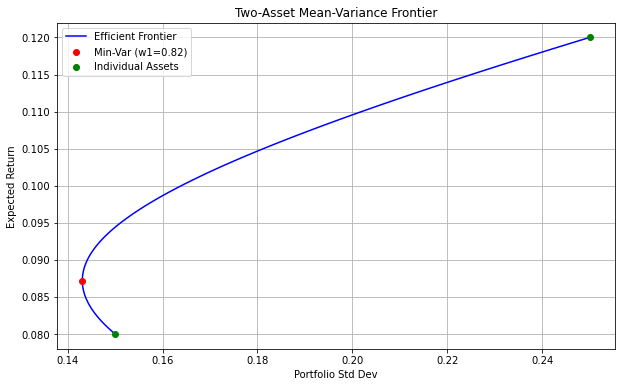

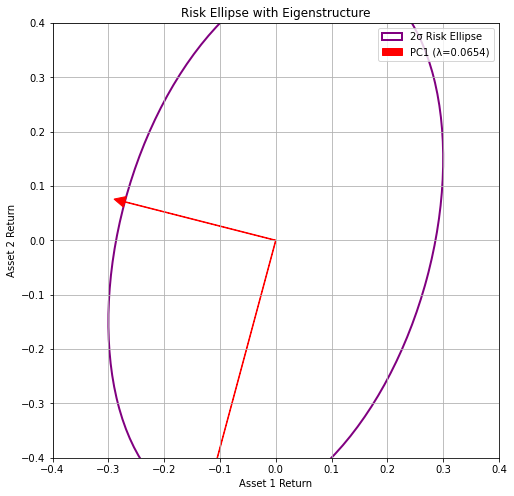


Varying Correlation Impact:
ρ=-0.8: Min-var weight asset 1 = 0.638


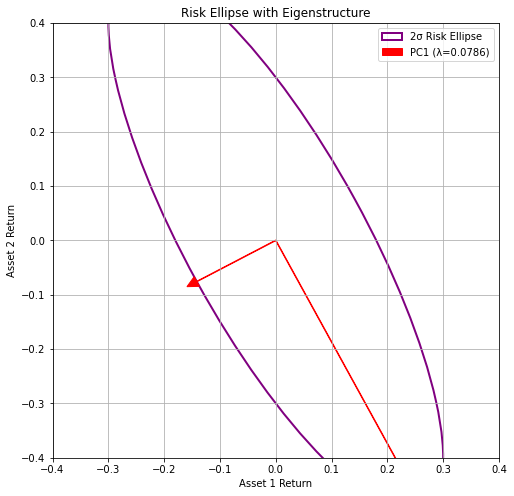

ρ=0.0: Min-var weight asset 1 = 0.735


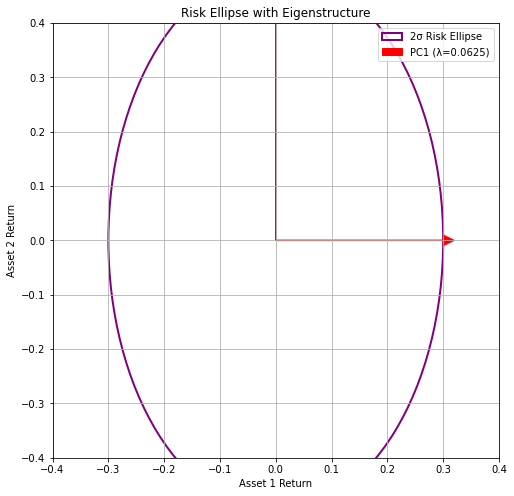

ρ=0.8: Min-var weight asset 1 = 1.300


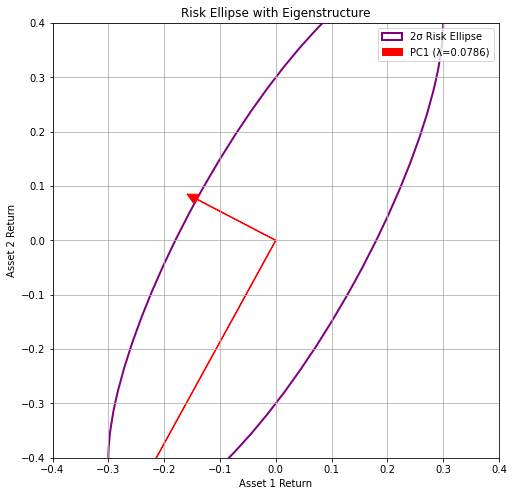

Capstone Summary: Analyzer visualizes frontier (diversification curve), min-var point, and risk ellipse geometry.
Key insight: Negative ρ → curved frontier/collapsed ellipse (strong diversification); high ρ → straight line (no benefit). Real use: Stock-bond allocation decisions.


In [3]:
# Covariance Geometry in a Two-Asset World - Capstone Project

# Capstone: Build a reusable two-asset portfolio analyzer
# - Computes covariance matrix from user inputs (variances, correlation)
# - Calculates portfolio variance/return for weight grid
# - Finds and marks minimum-variance portfolio
# - Plots the risk-return frontier and variance ellipse with eigenstructure
# - Varies correlation to show diversification impact
# Real-world tie-in: Core tool for mean-variance optimization (e.g., stock-bond allocation). Visualizes how correlation drives diversification benefit and ellipse shape—used in robo-advisors/portfolio construction.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

class TwoAssetAnalyzer:
    def __init__(self, mu1=0.08, mu2=0.12, sigma1=0.15, sigma2=0.25, rho=0.3):
        self.mu1 = mu1      # Expected return asset 1
        self.mu2 = mu2      # Expected return asset 2
        self.sigma1 = sigma1
        self.sigma2 = sigma2
        self.rho = rho
      
    def cov_matrix(self):
        cov = self.rho * self.sigma1 * self.sigma2
        return np.array([[self.sigma1**2, cov],
                         [cov, self.sigma2**2]])
    
    def portfolio_stats(self, w1):
        w = np.array([w1, 1 - w1])
        cov = self.cov_matrix()
        port_var = w @ cov @ w
        port_std = np.sqrt(port_var)
        port_ret = w[0] * self.mu1 + w[1] * self.mu2
        return port_ret, port_std
    
    def min_variance_weight(self):
        cov = self.cov_matrix()
        return (cov[1,1] - cov[0,1]) / (cov[0,0] + cov[1,1] - 2 * cov[0,1])
    
    def plot_frontier(self):
        weights = np.linspace(0, 1, 101)
        rets, stds = zip(*[self.portfolio_stats(w) for w in weights])
        
        w_min = self.min_variance_weight()
        ret_min, std_min = self.portfolio_stats(w_min)
        
        plt.figure(figsize=(10, 6))
        plt.plot(stds, rets, 'b-', label='Efficient Frontier')
        plt.scatter(std_min, ret_min, color='red', zorder=5, label=f'Min-Var (w1={w_min:.2f})')
        plt.scatter([self.sigma1, self.sigma2], [self.mu1, self.mu2], color='green', zorder=5, label='Individual Assets')
        plt.title('Two-Asset Mean-Variance Frontier')
        plt.xlabel('Portfolio Std Dev')
        plt.ylabel('Expected Return')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def plot_risk_ellipse(self):
        cov = self.cov_matrix()
        eigvals, eigvecs = np.linalg.eig(cov)
        idx = eigvals.argsort()[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        
        # 2-sigma ellipse
        width, height = 4 * np.sqrt(eigvals)  # 2-std for visibility
        angle = np.degrees(np.arctan2(eigvecs[1,0], eigvecs[0,0]))
        
        fig, ax = plt.subplots(figsize=(8, 8))
        ellipse = Ellipse(xy=(0,0), width=width, height=height, angle=angle,
                          edgecolor='purple', fc='None', lw=2, label='2σ Risk Ellipse')
        ax.add_patch(ellipse)
        
        # Eigenvectors
        for i in range(2):
            vec = eigvecs[:, i] * 2 * np.sqrt(eigvals[i])
            ax.arrow(0, 0, vec[0], vec[1], head_width=0.02, head_length=0.02,
                     fc='red', ec='red', label=f'PC{i+1} (λ={eigvals[i]:.4f})' if i==0 else "")
        
        ax.set_xlim(-0.4, 0.4)
        ax.set_ylim(-0.4, 0.4)
        ax.set_title('Risk Ellipse with Eigenstructure')
        ax.set_xlabel('Asset 1 Return')
        ax.set_ylabel('Asset 2 Return')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example usage
analyzer = TwoAssetAnalyzer(mu1=0.08, mu2=0.12, sigma1=0.15, sigma2=0.25, rho=0.3)

print("Capstone: Two-Asset Portfolio Analyzer")
print(f"Asset 1: μ={analyzer.mu1:.1%}, σ={analyzer.sigma1:.1%}")
print(f"Asset 2: μ={analyzer.mu2:.1%}, σ={analyzer.sigma2:.1%}")
print(f"Correlation ρ={analyzer.rho}")

analyzer.plot_frontier()
analyzer.plot_risk_ellipse()

# Vary correlation for impact
print("\nVarying Correlation Impact:")
for rho_test in [-0.8, 0.0, 0.8]:
    analyzer.rho = rho_test
    w_min = analyzer.min_variance_weight()
    print(f"ρ={rho_test}: Min-var weight asset 1 = {w_min:.3f}")
    analyzer.plot_risk_ellipse()  # Shows ellipse collapse with high ρ

print("Capstone Summary: Analyzer visualizes frontier (diversification curve), min-var point, and risk ellipse geometry.")
print("Key insight: Negative ρ → curved frontier/collapsed ellipse (strong diversification); high ρ → straight line (no benefit). Real use: Stock-bond allocation decisions.")

In [ ]:
# Covariance Geometry
# Questions for deeper (applied) understanding of concepts.

# Q1: "A junior analyst shows you a covariance matrix with a negative eigenvalue. What do you say?"
# Answer:
# A covariance matrix must be positive semi-definite (PSD) by definition—all eigenvalues ≥ 0—because variances are non-negative and the matrix represents a valid quadratic form for risk.
# A negative eigenvalue usually comes from estimation error (small sample, noise, or numerical issues). I'd explain this violates mathematical validity (implies negative variance in some direction).
# Fix: Clip negative eigenvalues to small positive, or use shrinkage/regularization (e.g., Ledoit-Wolf) for better-conditioned estimate. In practice, non-PSD crashes optimizers—always check eigendecomposition first.

# Q2: "Why does high positive correlation make diversification 'harder' in a two-asset portfolio?"
# Answer:
# High positive correlation means assets move together—joint risk reinforces individual risks rather than canceling.
# Geometrically, the risk ellipse elongates into a line (near-singular covariance); minimum-variance portfolio weight approaches 50/50 with little risk reduction below weighted average.
# Diversification benefit (variance drop) comes from negative/off-diagonal terms—high ρ weakens them. Extreme ρ→1: Portfolio risk ≈ max individual risk, no meaningful hedge.

# Q3: "Explain the intuition behind using eigenvalues to identify 'dominant risk factors' in covariance."
# Answer:
# Eigenvalues measure variance along orthogonal eigenvector directions (principal components).
# The largest eigenvalue captures the direction of maximum spread (common/market factor driving both assets).
# Smaller eigenvalues show residual/idiosyncratic directions. In two assets, PC1 often aligns with correlated movement (systematic risk), PC2 with diversification (anti-correlated residual).
# Practical: High ratio large/small eig → most risk is shared (factor-like); low ratio → more diversifiable.

# Q4: "When would you prefer a shrunk covariance estimate over the sample covariance in portfolio construction?"
# Answer:
# Sample covariance is noisy/unstable in small samples or high dimensions (curse of dimensionality)—leads to extreme weights, poor out-of-sample performance.
# Shrinkage pulls toward structured target (e.g., constant correlation or diagonal)—reduces estimation error, stabilizes weights, improves Sharpe.
# Prefer shrunk when T (observations) < N (assets) or high noise—common in equity portfolios. Ledoit-Wolf optimal for many cases; always better than raw sample in practice.

# Q5: "How does the geometry of the variance ellipse change as correlation goes from -1 to +1, and what does that mean for the minimum-variance portfolio?"
# Answer:
# ρ = -1: Ellipse collapses to a line segment (perfect negative)—min-var at corner (100% higher-vol asset, zero risk possible).
# ρ = 0: Circle/ellipse aligned with axes—balanced min-var, moderate diversification.
# ρ → +1: Ellipse elongates to line along 45° (perfect positive)—min-var near 50/50, risk approaches weighted average (no diversification).
# Meaning: Negative ρ enables huge risk reduction (ellipse "flat"); positive ρ limits to near individual risks. Min-var weight shifts from extremes (negative ρ) to center (positive ρ).